In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
df = pd.read_csv("C://Users//Manisha Chandanshiv//OneDrive//ドキュメント//Excelr assignment Questions//Data Science//Logistic Regression//Logistic Regression//Titanic_train.csv")

# Display first 5 rows
print(df.head())

# Check basic information about the dataset
print(df.info())

# Summary statistics
print(df.describe(include='all'))


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

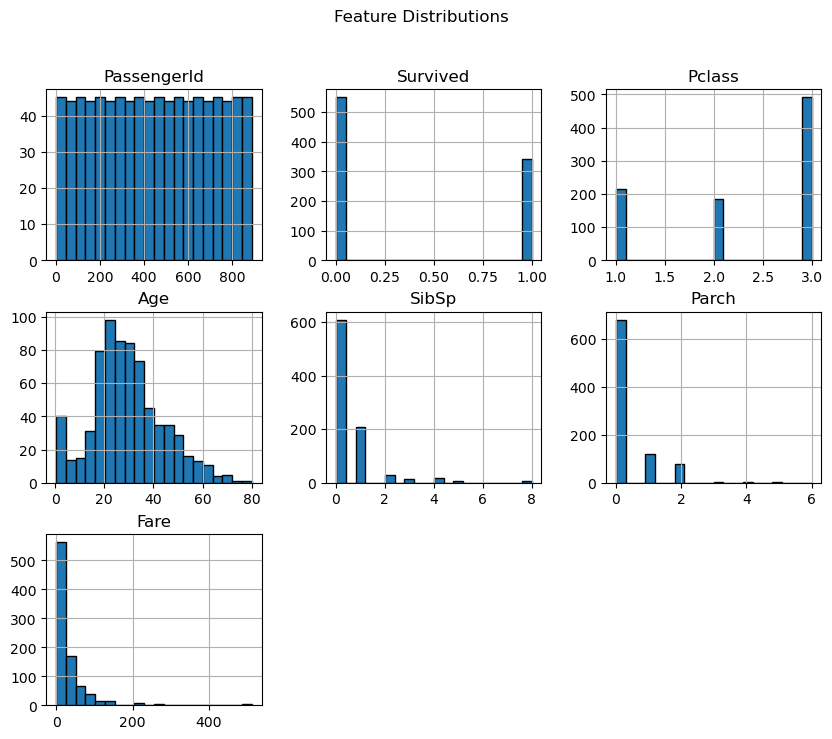

In [16]:
df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

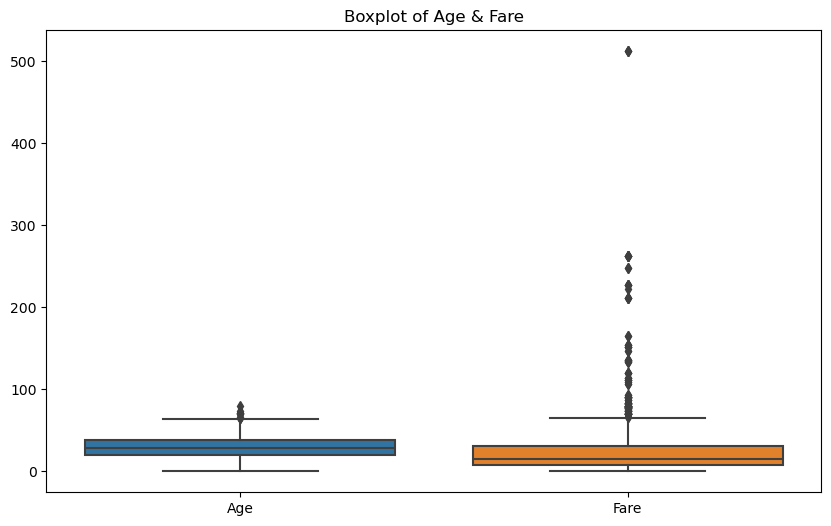

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title('Boxplot of Age & Fare')
plt.show()


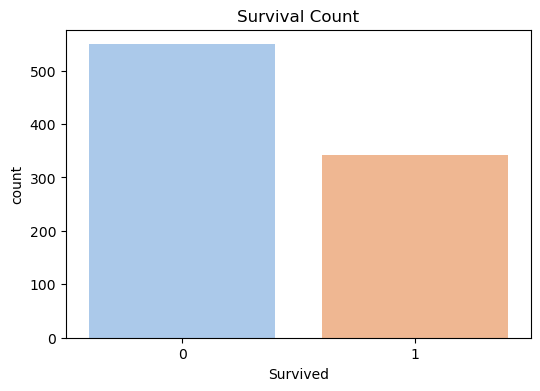

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df, palette='pastel')
plt.title('Survival Count')
plt.show()

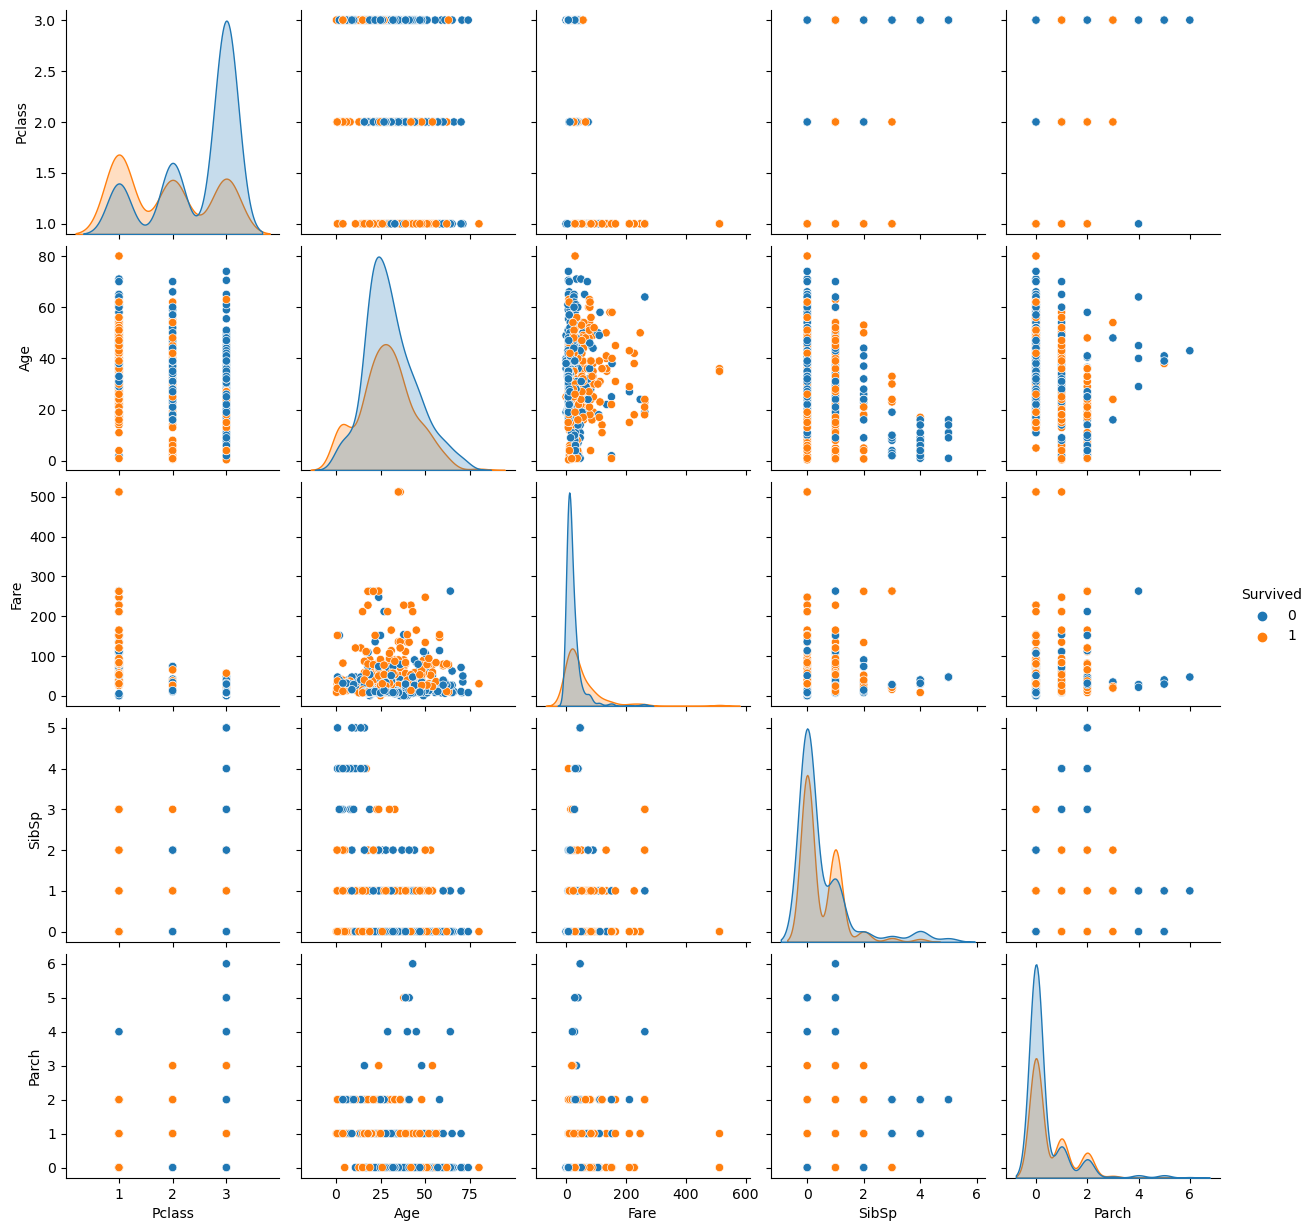

In [19]:
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].dropna(), hue='Survived')
plt.show()

C:\Users\Manisha Chandanshiv\AppData\Local\Temp\ipykernel_25924\1361017534.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


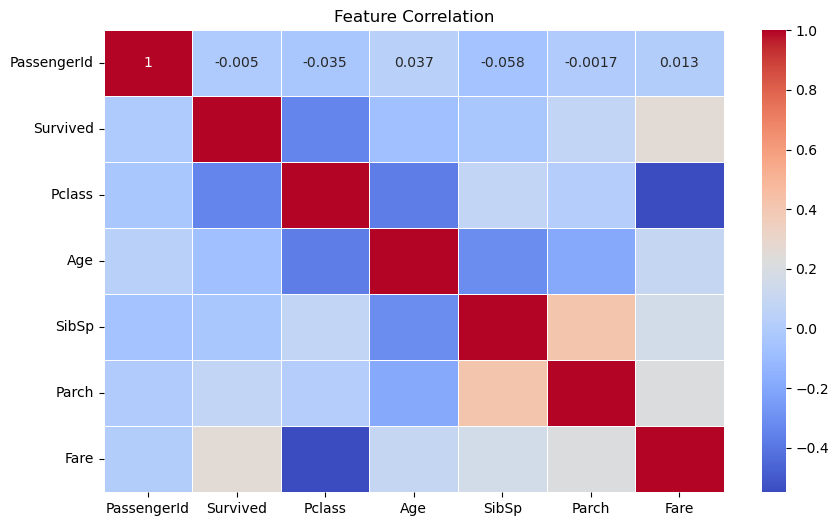

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation')
plt.show()


In [21]:
# Check missing values
print(df.isnull().sum())

# Fill missing Age values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked values with the most common category (mode)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column since it has too many missing values
df.drop(columns=['Cabin'], inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [22]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for categorical variables
label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Display first few rows after encoding
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Embarked  
0         A/5 21171   7.2500         2  
1          PC 17599  71.2833         0  
2  STON/O2. 3101282   7.9250         2  
3            113803  53.1000         2  
4            373450   8.0500         2  


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    # Drop irrelevant columns
    df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], errors='ignore')

    # Handle missing values
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

    # Encode categorical variables
    label_encoders = {}
    for col in ['Sex', 'Embarked']:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le  # Store encoders if needed later

    return df, label_encoders

# Apply preprocessing
df, label_encoders = preprocess_data(df)



In [26]:
# Define features (X) and target (y)
X = df.drop(columns=['Survived'])
y = df['Survived']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC-AUC

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       110
           1       0.78      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179

Accuracy: 0.7989
Precision: 0.7797
Recall: 0.6667
F1-score: 0.7188
ROC-AUC Score: 0.8519


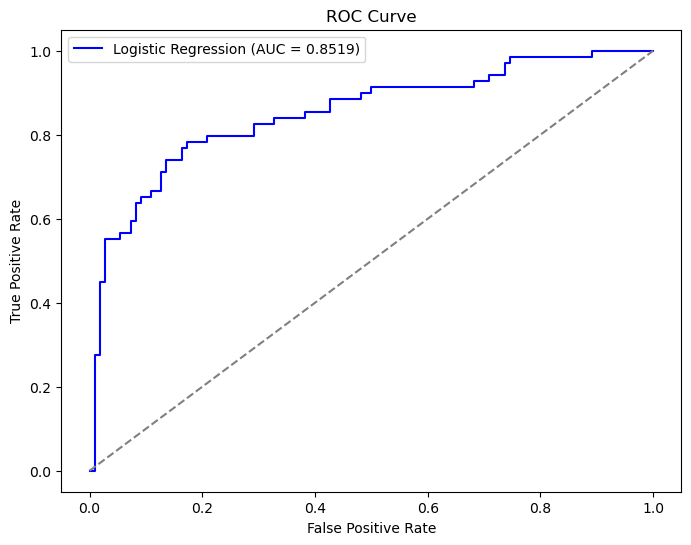

In [28]:
# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


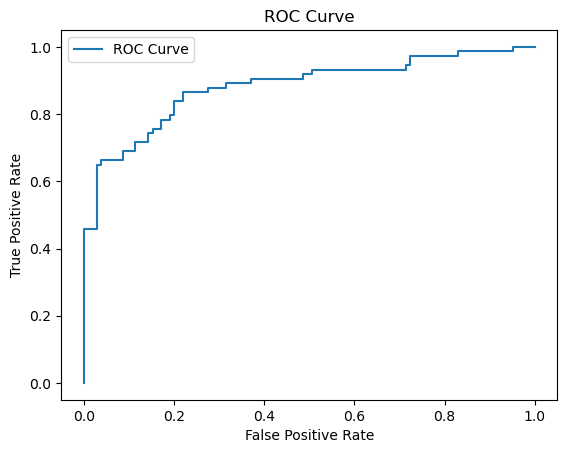

In [11]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [30]:
import pandas as pd
import numpy as np

# If X_train was originally a DataFrame, retrieve feature names before transformation
feature_names = X.columns  # Get original feature names before transformation

# Extract coefficients from the trained logistic regression model
coefficients = model.coef_[0]  # Extract coefficients

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Odds Ratio'] = np.exp(coef_df['Coefficient'])  # Convert to odds ratio
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)  # Sort by importance

# Display the coefficients
print(coef_df)


    Feature  Coefficient  Odds Ratio
5      Fare     0.098486    1.103499
4     Parch    -0.082296    0.920999
6  Embarked    -0.184912    0.831178
3     SibSp    -0.265111    0.767121
2       Age    -0.495228    0.609432
0    Pclass    -0.889408    0.410899
1       Sex    -1.285336    0.276558


In [31]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
!cd 

C:\Users\Manisha Chandanshiv


In [35]:
import joblib  

# Assuming 'model' is your trained logistic regression model
joblib.dump(model, 'logistic_model.pkl')
print("Model saved successfully!")


Model saved successfully!


In [36]:
import streamlit as st
import joblib
import numpy as np

# Load the trained model
model = joblib.load('logistic_model.pkl')

# Title of the app
st.title("Logistic Regression Prediction App")

# Create user input fields
st.sidebar.header("User Input Features")

# Example: Assuming the model has 2 numerical features
feature1 = st.sidebar.number_input("Enter Feature 1 Value", value=0.0)
feature2 = st.sidebar.number_input("Enter Feature 2 Value", value=0.0)

# Convert inputs to a numpy array
user_input = np.array([[feature1, feature2]])

# Predict button
if st.sidebar.button("Predict"):
    prediction = model.predict(user_input)
    st.write(f"Predicted Class: {prediction[0]}")


2025-02-14 22:25:53.682 
  command:

    streamlit run C:\Users\Manisha Chandanshiv\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
